In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Softmax
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report
from keras.models import Sequential

In [2]:
root_path="C:/Users/DELL/Desktop/pythonproj/PICTURES/dataset_10seeds"
class_names = sorted(os.listdir(root_path))[:-1]
class_names

['IR20',
 'adt37',
 'amman',
 'andhra bpt',
 'eramalli',
 'karuppu kavuni',
 'keerthi',
 'mtu 1010',
 'mtu 1290',
 'narmadha',
 'pacha ponni']

In [3]:
file_path ="C:/Users/DELL/Desktop/pythonproj/PICTURES/dataset_10seeds"

In [4]:
filepaths= list(glob.glob(file_path+'/**/*.*'))

In [5]:
print(filepaths[0:2])

['C:/Users/DELL/Desktop/pythonproj/PICTURES/dataset_10seeds\\adt37\\adt37 (1).jpg', 'C:/Users/DELL/Desktop/pythonproj/PICTURES/dataset_10seeds\\adt37\\adt37 (10).jpg']


In [6]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [7]:
labels

['adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',


In [8]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data= data.sample(frac=1).reset_index(drop=True)
data.head(12)

,Filepath,Label
0,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,IR20
1,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,mtu 1010
2,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,keerthi
3,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,eramalli
4,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,karuppu kavuni
5,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,narmadha
6,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,mtu 1010
7,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,sonna masur
8,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,narmadha
9,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,andhra bpt


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IR20'),
  Text(1, 0, 'mtu 1010'),
  Text(2, 0, 'keerthi'),
  Text(3, 0, 'eramalli'),
  Text(4, 0, 'karuppu kavuni'),
  Text(5, 0, 'narmadha'),
  Text(6, 0, 'sonna masur'),
  Text(7, 0, 'andhra bpt'),
  Text(8, 0, 'pacha ponni'),
  Text(9, 0, 'adt37'),
  Text(10, 0, 'mtu 1290'),
  Text(11, 0, 'amman')])

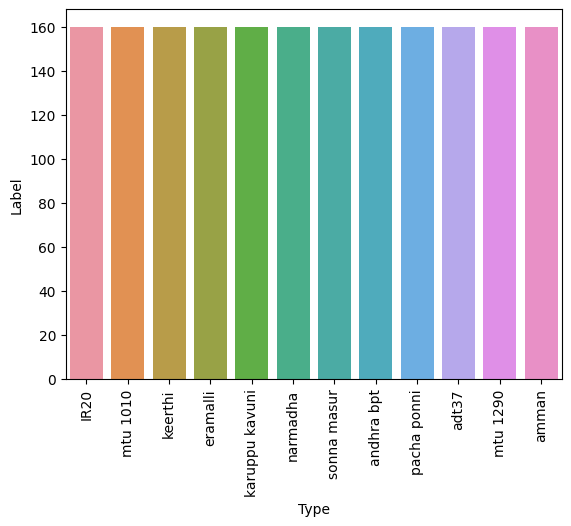

In [9]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90)

In [10]:
train, test= train_test_split(data, test_size=0.30, random_state=42)

In [11]:
test, valid = train_test_split(test, test_size=0.5, random_state=42)

In [12]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=180,
    width_shift_range=1.0,
    height_shift_range=1.0,
    shear_range=0.7,
    zoom_range=0.7,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=180,
    width_shift_range=1.0,
    height_shift_range=1.0,
    shear_range=0.7,
    zoom_range=0.7,
    horizontal_flip=True,
    fill_mode='nearest')

In [13]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(512,512),
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=40
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(512,512),
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=40
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(512,512),
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
)

Found 1344 validated image filenames belonging to 12 classes.
Found 288 validated image filenames belonging to 12 classes.
Found 288 validated image filenames belonging to 12 classes.


In [14]:
model = tf.keras.Sequential([
    layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', input_shape=(512, 512, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(12, activation='softmax')
])

# Define the optimizer and compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



In [15]:
my_callbacks = [EarlyStopping(monitor='val_accuracy',
                             min_delta=0,
                             patience=2,
                             mode='auto')]

In [16]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=100
)

Epoch 1/100
21/21 [==============================] - 331s 16s/step - loss: 2.3996 - accuracy: 0.1548 - val_loss: 2.5163 - val_accuracy: 0.0729
Epoch 2/100
21/21 [==============================] - 301s 14s/step - loss: 2.2475 - accuracy: 0.2121 - val_loss: 2.4525 - val_accuracy: 0.0729
Epoch 3/100
21/21 [==============================] - 291s 14s/step - loss: 2.1589 - accuracy: 0.2292 - val_loss: 2.4214 - val_accuracy: 0.0764
Epoch 4/100
21/21 [==============================] - 293s 14s/step - loss: 2.1121 - accuracy: 0.2619 - val_loss: 2.3696 - val_accuracy: 0.1076
Epoch 5/100
21/21 [==============================] - 291s 14s/step - loss: 2.0577 - accuracy: 0.2775 - val_loss: 2.3404 - val_accuracy: 0.1319
Epoch 6/100
21/21 [==============================] - 286s 14s/step - loss: 2.0150 - accuracy: 0.3088 - val_loss: 2.3070 - val_accuracy: 0.1736
Epoch 7/100
21/21 [==============================] - 286s 14s/step - loss: 1.9599 - accuracy: 0.3043 - val_loss: 2.2381 - val_accuracy: 0.2049

Epoch 58/100
21/21 [==============================] - 313s 15s/step - loss: 0.9914 - accuracy: 0.6585 - val_loss: 1.3227 - val_accuracy: 0.5556
Epoch 59/100
21/21 [==============================] - 309s 15s/step - loss: 1.0035 - accuracy: 0.6585 - val_loss: 1.1801 - val_accuracy: 0.6597
Epoch 60/100
21/21 [==============================] - 321s 15s/step - loss: 1.0039 - accuracy: 0.6696 - val_loss: 1.2409 - val_accuracy: 0.5417
Epoch 61/100
21/21 [==============================] - 310s 15s/step - loss: 0.9894 - accuracy: 0.6622 - val_loss: 1.2343 - val_accuracy: 0.5868
Epoch 62/100
21/21 [==============================] - 307s 15s/step - loss: 0.9854 - accuracy: 0.6607 - val_loss: 1.2300 - val_accuracy: 0.6354
Epoch 63/100
21/21 [==============================] - 310s 15s/step - loss: 0.9384 - accuracy: 0.7054 - val_loss: 1.2219 - val_accuracy: 0.6215
Epoch 64/100
21/21 [==============================] - 318s 15s/step - loss: 0.9510 - accuracy: 0.6942 - val_loss: 1.2141 - val_accuracy:

In [17]:
test_loss, test_acc = model.evaluate(test_gen)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')


5/5 [==============================] - 35s 7s/step - loss: 1.0025 - accuracy: 0.6944
Test Loss: 1.002504825592041, Test Accuracy: 0.6944444179534912


In [18]:
model.save("model_best.h5")

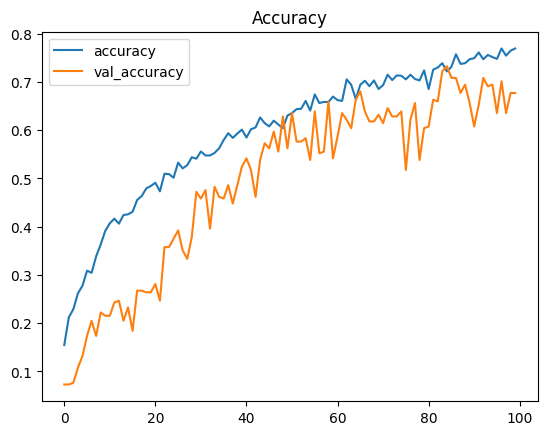

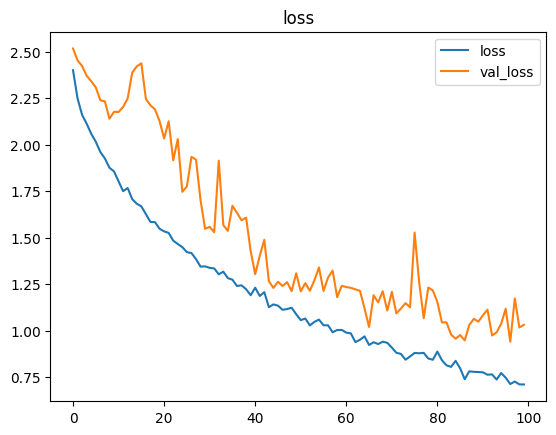

In [19]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("loss")
plt.show()

In [20]:
results = model.evaluate(test_gen, verbose=0)
print("   Test loss:  {:.5f}".format(results[0]))
print("Test Accuracy:  {:.2f}%".format(results[1] * 100))

   Test loss:  1.04738
Test Accuracy:  65.62%


In [21]:
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

5/5 [==============================] - 36s 7s/step


In [22]:
y_test = list(test.Label)
print(classification_report(y_test,pred))

                precision    recall  f1-score   support

          IR20       0.07      0.07      0.07        27
         adt37       0.08      0.07      0.08        27
         amman       0.10      0.12      0.11        26
    andhra bpt       0.07      0.15      0.10        26
      eramalli       0.04      0.05      0.05        21
karuppu kavuni       0.19      0.19      0.19        21
       keerthi       0.08      0.05      0.06        19
      mtu 1010       0.00      0.00      0.00        26
      mtu 1290       0.00      0.00      0.00        23
      narmadha       0.06      0.05      0.06        19
   pacha ponni       0.00      0.00      0.00        21
   sonna masur       0.14      0.09      0.11        32

      accuracy                           0.07       288
     macro avg       0.07      0.07      0.07       288
  weighted avg       0.07      0.07      0.07       288



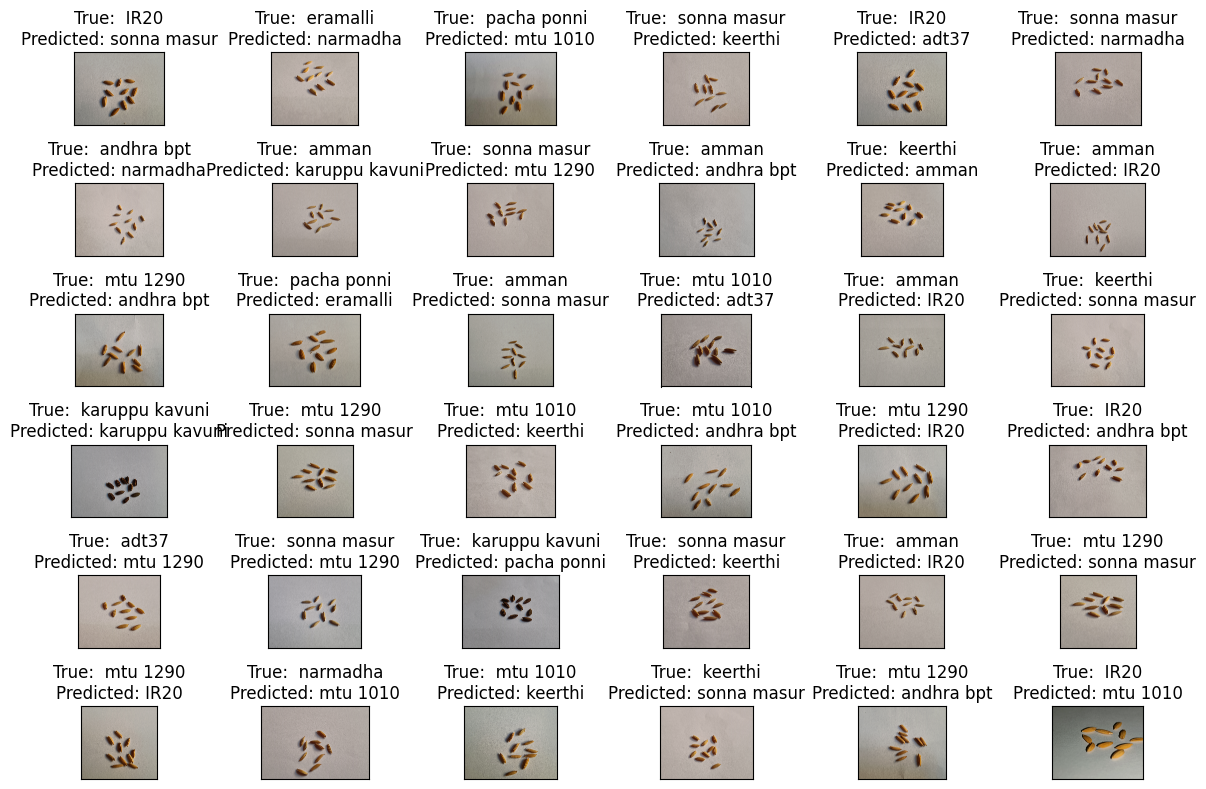

In [23]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(12,8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True:  {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()